In [1]:
## RunnableLambda
from langchain_aws.chat_models import ChatBedrockConverse
from langchain_core.prompts.chat import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda

prompt = ChatPromptTemplate(
    [
        (
            "system",
            "You are an expert python programmer and will answer questions concisely.",
        ),
        (
            "human",
            "Generate a list of 4 high-level concepts required to learn the python programming language, "
            "as a comma-separated list with no extra text.",
        ),
    ]
)


def convert_list_to_concepts(sentence):
    return [x.strip() for x in sentence.content.split(",")]


model = ChatBedrockConverse(model="us.meta.llama3-1-70b-instruct-v1:0", region_name="us-east-1")
chain = prompt | model | RunnableLambda(convert_list_to_concepts)

response = chain.invoke({})
print(response)

['Variables', 'Control Structures', 'Functions', 'Object-Oriented Programming']


<class 'langchain_core.prompts.chat.ChatPromptTemplate'> input_variables=[] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert python programmer and will answer questions concisely.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='Generate a list of 4 high-level concepts required to learn the python programming language, as a comma-separated list with no extra text.'), additional_kwargs={})]
<class 'langchain_aws.chat_models.bedrock_converse.ChatBedrockConverse'> disable_streaming='tool_calling' client=<botocore.client.BedrockRuntime object at 0x72aa3b5a4e20> model_id='us.meta.llama3-1-70b-instruct-v1:0' region_name='us-east-1' provider='us' supports_tool_choice_values=()
<class 'langchain_core.runnables.base.RunnableLambda'> RunnableLambda(convert_list_to_concepts

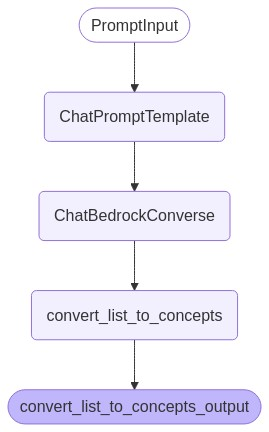

In [2]:
## RunnableSequence
sequence_steps = chain.steps
for step in sequence_steps:
    print(type(step), step)

graph = chain.get_graph()
print(type(graph))

import io

from PIL import Image

display(Image.open(io.BytesIO(graph.draw_mermaid_png())))

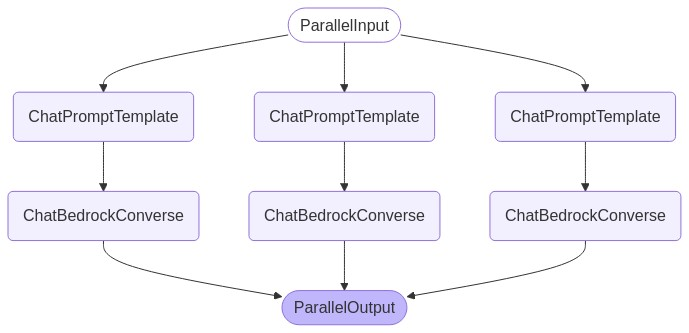

Description: 

**Python List Comprehensions**

A concise way to create lists in Python, list comprehensions combine the benefits of loops and conditional statements in a single, readable expression.

**Basic Syntax**
```python
[expression for variable in iterable (if condition)]
```
**Components**

* `expression`: The operation to perform on each element of the `iterable`.
* `variable`: The temporary variable used to represent each element in the `iterable`.
* `iterable`: The list, tuple, or other iterable to process.
* `condition` (optional): A filter clause to include only elements that meet the specified condition.

**Example**
```python
numbers = [1, 2, 3, 4, 5]
double_numbers = [x * 2 for x in numbers if x % 2 == 0]
print(double_numbers)  # [4, 8]
```
**Benefits**

* Concise and readable code
* Faster execution compared to traditional loops
* Reduced memory usage

**Use Cases**

* Data transformation and filtering
* Creating new lists from existing iterables
* Simplifying code wit

In [3]:
## RunnableParallel
description_chain = (
    ChatPromptTemplate.from_template("Write a concise description of python list comprehensions.") | model
)

example_chain = ChatPromptTemplate.from_template("Provide three examples of python list comprehensions.") | model

quiz_chain = (
    ChatPromptTemplate.from_template("Provide three multiple choice questions about python list comprehensions.")
    | model
)

from langchain_core.runnables import RunnableParallel

parallel_chain = RunnableParallel(description=description_chain, examples=example_chain, quiz=quiz_chain)

display(Image.open(io.BytesIO(parallel_chain.get_graph().draw_mermaid_png())))

results = parallel_chain.invoke({})
print("Description:", results["description"].content)
print("Examples:", results["examples"].content)
print("Quiz:", results["quiz"].content)

In [4]:
## RunnableEach
prompt = ChatPromptTemplate.from_template(
    "Generate a list of 7 high-level concepts for learning the {language} language, "
    "as a comma-separated list with no extra text."
)

concepts_chain = prompt | model | RunnableLambda(convert_list_to_concepts)


def convert_text_to_values(model_response):
    langs = [x.strip() for x in model_response.content.split(",")]
    return [{"language": lng} for lng in langs]


languages_chain = (
    ChatPromptTemplate.from_template(
        "List five popular programming languages, as a comma-separated list with no extra text."
    )
    | model
    | RunnableLambda(convert_text_to_values)
)

chain_map = languages_chain | concepts_chain.map()

from langchain.globals import set_debug

set_debug(True)

final_result = chain_map.invoke({})
print(final_result)

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{}
[chain/start] [chain:RunnableSequence > prompt:ChatPromptTemplate] Entering Prompt run with input:
{}
[chain/end] [chain:RunnableSequence > prompt:ChatPromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > llm:ChatBedrockConverse] Entering LLM run with input:
{
  "prompts": [
    "Human: List five popular programming languages, as a comma-separated list with no extra text."
  ]
}
[llm/end] [chain:RunnableSequence > llm:ChatBedrockConverse] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "\n\nPython, Java, JavaScript, C++, C#",
        "generation_info": null,
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs": {
            "content": "\n\

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{}
[chain/start] [chain:RunnableSequence > prompt:ChatPromptTemplate] Entering Prompt run with input:
{}
[chain/end] [chain:RunnableSequence > prompt:ChatPromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > llm:ChatBedrockConverse] Entering LLM run with input:
{
  "prompts": [
    "Human: List five popular programming languages, as a comma-separated list with no extra text."
  ]
}
[llm/end] [chain:RunnableSequence > llm:ChatBedrockConverse] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "\n\nPython, Java, JavaScript, C++, C#",
        "generation_info": null,
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs": {
            "content": "\n\

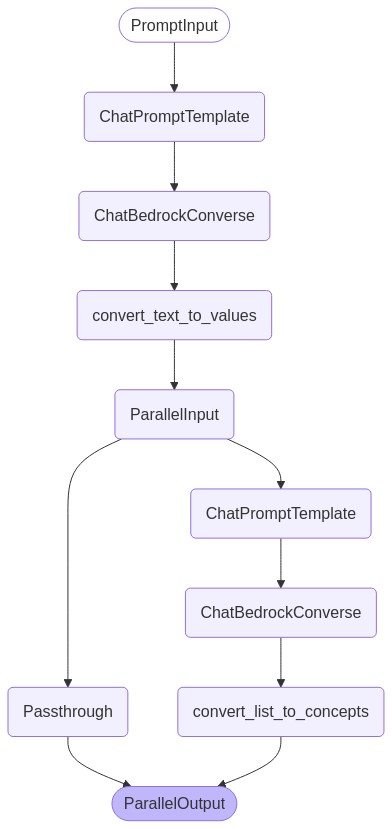

In [5]:
## RunnablePassthrough
from langchain_core.runnables import RunnablePassthrough

chain_passthrough = languages_chain | RunnableParallel(lang=RunnablePassthrough(), concepts=concepts_chain).map()

passthrough_result = chain_passthrough.invoke({})
print(passthrough_result)

display(Image.open(io.BytesIO(chain_passthrough.get_graph().draw_mermaid_png())))